<a href="https://colab.research.google.com/github/Esther-Wagatwe/EASY-ML/blob/master/Pca_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load and Standardize the Dataset

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
Link to the data

https://data.mendeley.com/datasets/63fpbc9cm4/1
---

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data # Features from the dataset
y = data.target # Features and target from the dataset
feature_names = data.feature_names # Feature names from the dataset
target_names = data.target_names # Target names from the dataset

df = pd.DataFrame(X, columns=feature_names) # Create DataFrame with features
df['target'] = y  # Add target column to DataFrame
df['label'] = df['target'].apply(lambda i: target_names[i]) # Map target to labels

scaler = StandardScaler() # Standardize the features
X_scaled = scaler.fit_transform(X) # Standardize the features

df.head() # Display the first few rows of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


## Step 2: Visualize Original Feature Distributions (Subset)

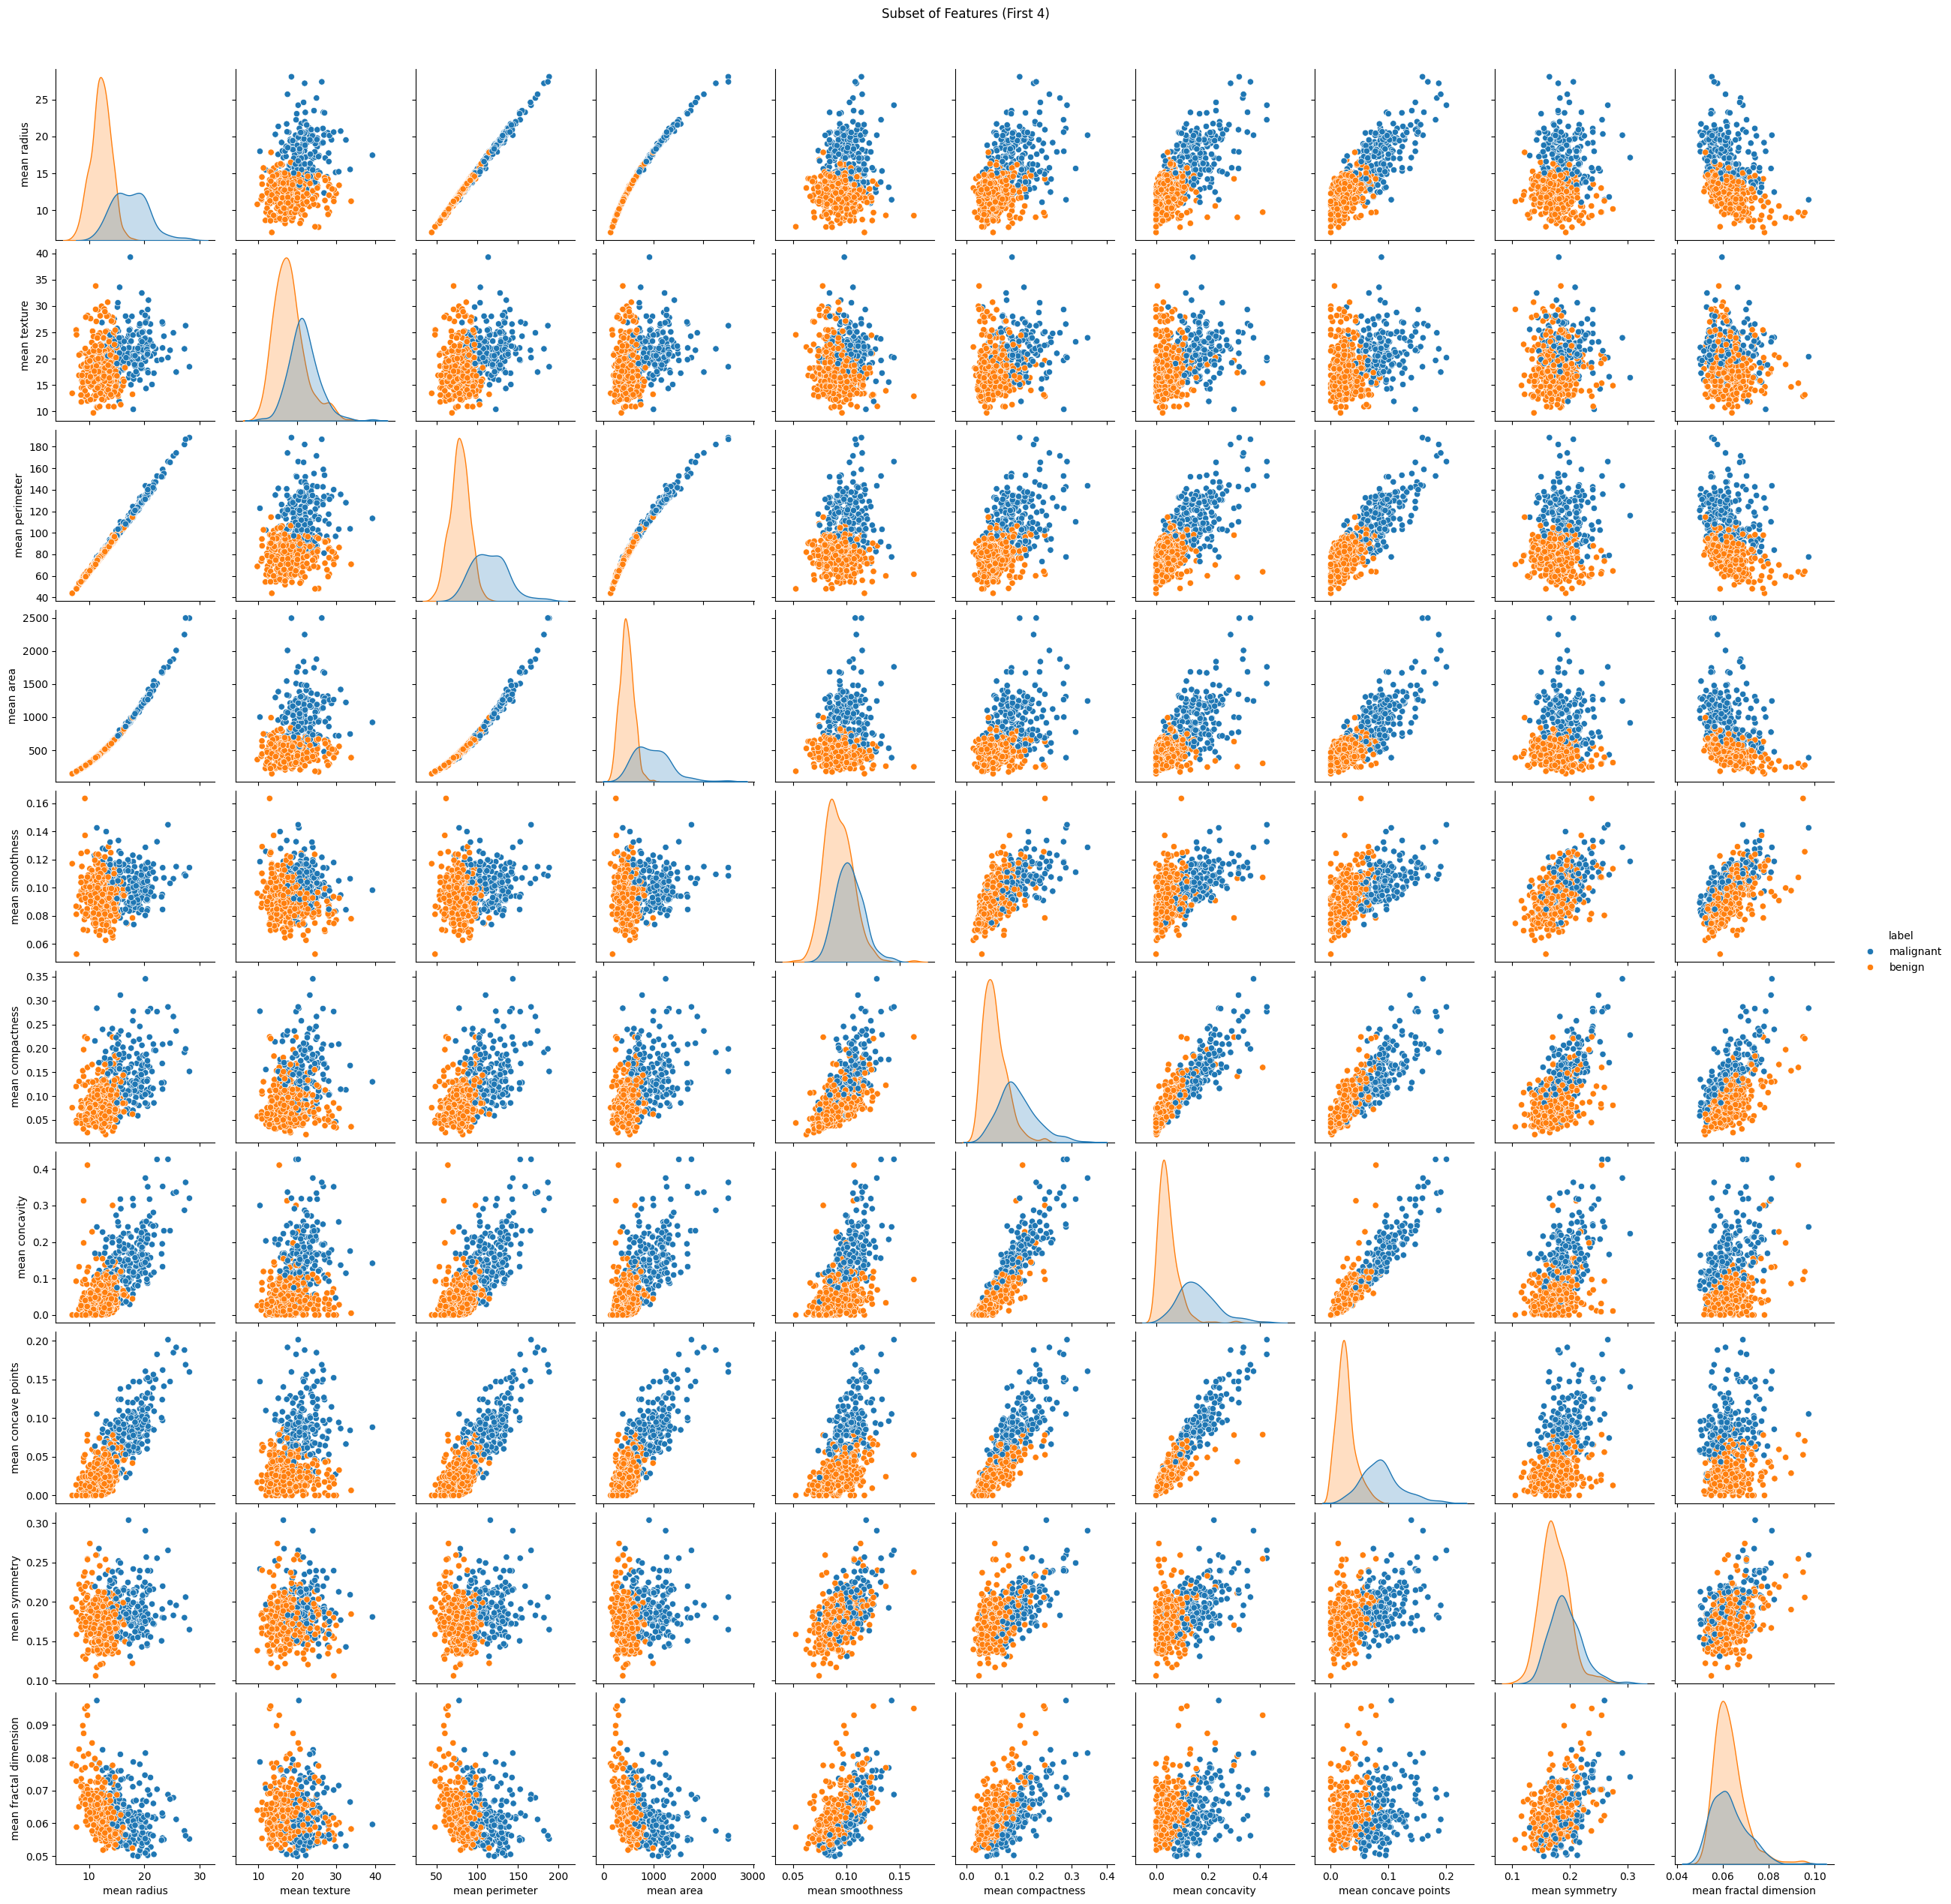

In [ ]:
sns.pairplot(df.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9] + [-1]], hue='label', diag_kind='kde') # First 4 features and target label
plt.suptitle('Subset of Features (First 4)', y=1.02) # Adjust title position
plt.show()

## Step 4: PCA via SVD and Explained Variance

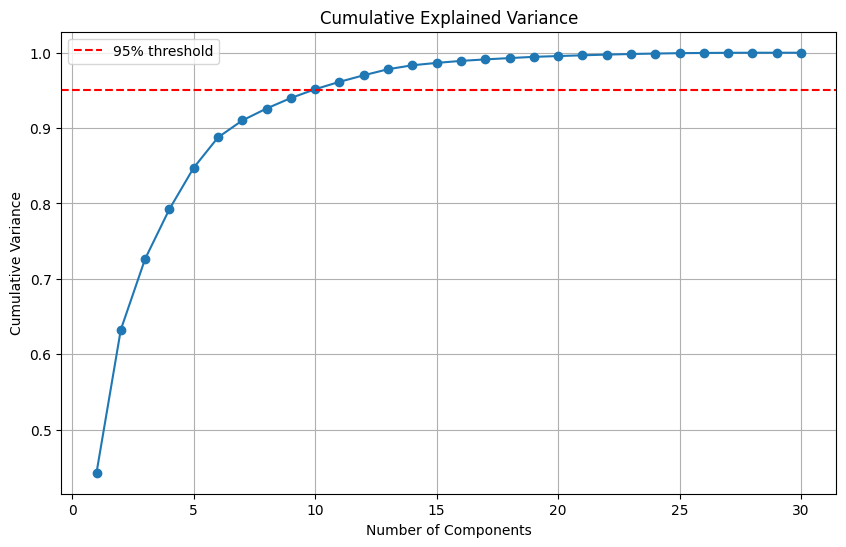

In [ ]:
pca = PCA() # Initialize PCA without specifying n_components
X_pca = pca.fit_transform(X_scaled) # Fit PCA to the standardized data
explained = pca.explained_variance_ratio_ # Get the explained variance ratio for each component
cumulative = np.cumsum(explained) # Calculate cumulative explained variance

plt.figure(figsize=(10, 6)) # Plot cumulative explained variance
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o') # Plot cumulative variance
plt.axhline(0.95, color='red', linestyle='--', label='95% threshold') # Add a horizontal line at 95% threshold
plt.title('Cumulative Explained Variance') # Title of the plot
plt.xlabel('Number of Components') # X-axis label
plt.ylabel('Cumulative Variance') # Y-axis label
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
cumulative*100

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

## Step 5: PCA Score Plot (First 2 PCs)

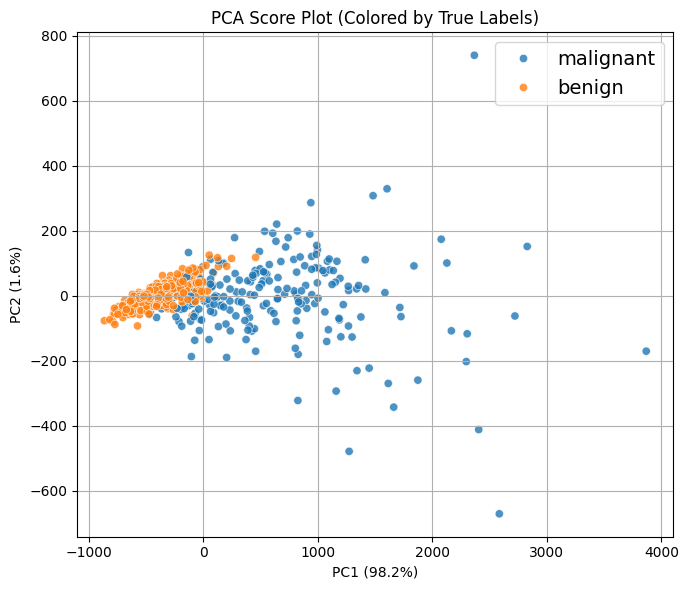

In [ ]:

# Fit PCA (assumes X and df['label'] exist)
pca = PCA(n_components=2) # Fit PCA to the data, reducing to 2 components
X_pca = pca.fit_transform(X)  # Transform the data to PCA space


cumulative = np.cumsum(explained)
cumulative = cumulative*100

# Explained variance ratios
expl_var = pca.explained_variance_ratio_ * 100 # Convert to percentage
pc1_label = f'PC1 ({expl_var[0]:.1f}%)' # Label for PC1 with explained variance
pc1_label = f'PC1 ({expl_var[0]:.1f}%)' # Label for PC1 with explained variance

pc2_label = f'PC2 ({expl_var[1]:.1f}%)' # Label for PC2 with explained variance



# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=[pc1_label, pc2_label]) # Add PCA components to DataFrame
pca_df['label'] = df['label'] # Add labels to DataFrame for coloring in the plot

# Scatter plot with % variance on axes
plt.figure(figsize=(7, 6))
sns.scatterplot(data=pca_df, x=pc1_label, y=pc2_label, hue='label', alpha=0.8) # Scatter plot of PCA components
plt.title('PCA Score Plot (Colored by True Labels)')
plt.grid(True)
plt.legend(loc='best', fontsize=14, frameon=True)
plt.tight_layout()
plt.show()


## Step 6: PCA Loadings (PC1 vs PC2)

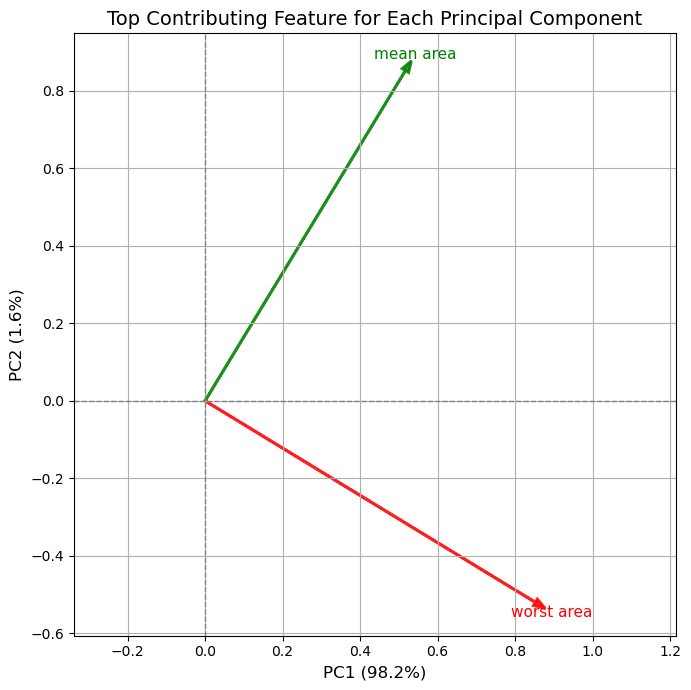

In [ ]:
# Extract PCA loading matrix for first two components
loadings = pca.components_[:2].T  # shape: (n_features, 2)

# Identify top contributing feature for each PC
top_pc1_idx = np.argmax(np.abs(loadings[:, 0])) # Index of the feature with the highest absolute loading on PC1
top_pc2_idx = np.argmax(np.abs(loadings[:, 1])) # Index of the feature with the highest absolute loading on PC2
top_indices = [top_pc1_idx, top_pc2_idx] # Indices of the top contributing features for PC1 and PC2

# Optional: assign distinct colors to each vector
colors = ['red', 'green']

# Plot
plt.figure(figsize=(7, 7)) # Create a square figure for equal aspect ratio
for i, color in zip(top_indices, colors): # Loop through top indices and colors
    x, y = loadings[i, 0], loadings[i, 1] # Get the loading values for the feature
    plt.arrow(0, 0, x, y,  # Draw arrow from origin to feature loading
              head_width=0.02, head_length=0.03,  # Arrow properties
              color=color, alpha=0.85, linewidth=2) # Arrow properties
    plt.text(x * 1.05, y * 1.05, feature_names[i], # Annotate the feature name
             fontsize=11, ha='center', va='center', color=color) # Adjust text position and color

# Axes and grid
plt.axhline(0, color='gray', linestyle='--', linewidth=1) # Horizontal line at y=0
plt.axvline(0, color='gray', linestyle='--', linewidth=1) # Vertical line at x=0
plt.xlabel(f'PC1 ({expl_var[0]:.1f}%)', fontsize=12) # X-axis label
plt.ylabel(f'PC2 ({expl_var[1]:.1f}%)', fontsize=12) # Y-axis label



plt.title('Top Contributing Feature for Each Principal Component', fontsize=14) # Title of the plot
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
